In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseGrLivArea.shape

(1460, 1)

In [11]:
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
houseSalePrice.shape

(1460, 1)

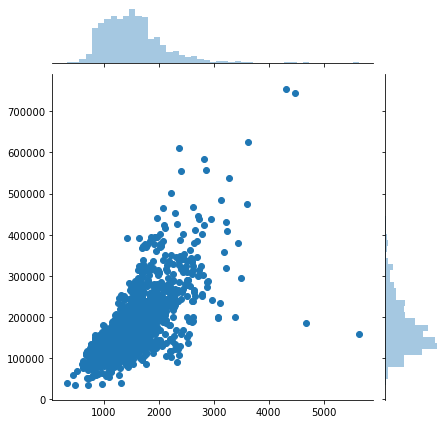

In [5]:
sb.jointplot(x = houseGrLivArea , y = houseSalePrice)

In [8]:
correlation = pd.concat([houseGrLivArea , houseSalePrice] , axis=1)
correlation.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


In [19]:
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

In [20]:
print(houseGrLivArea_train.shape)
print(houseGrLivArea_test.shape)
print(houseSalePrice_train.shape)
print(houseSalePrice_test.shape)

(1100, 1)
(360, 1)
(1100, 1)
(360, 1)


In [21]:
houseGrLivArea_train.describe()

,GrLivArea
count,1100.000000
mean,1508.082727
std,509.574848
min,334.000000
25%,1125.750000
50%,1456.000000
75%,1768.000000
max,4676.000000


In [23]:
houseSalePrice_train.describe()

,SalePrice
count,1100.000000
mean,181253.129091
std,79584.698625
min,34900.000000
25%,130000.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


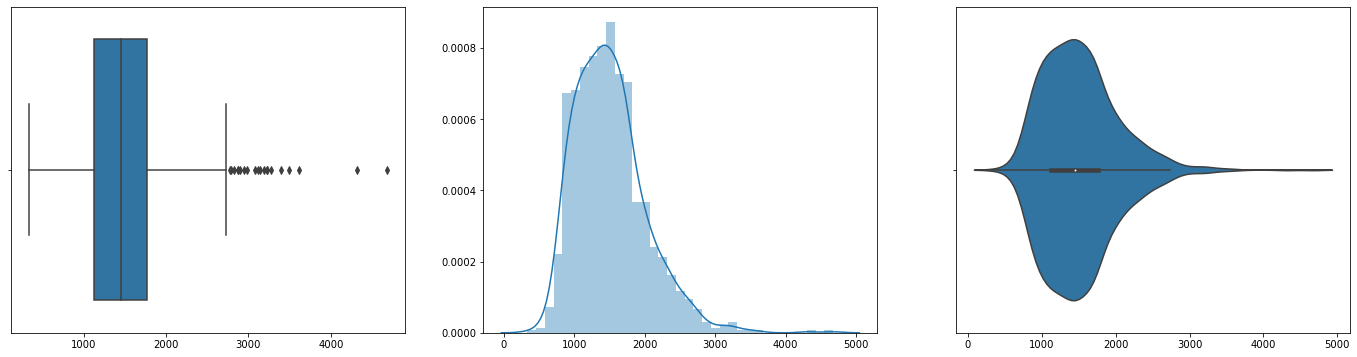

In [52]:
f , axes = plt.subplots(1 , 3 , figsize=(24, 6))
sb.boxplot(houseGrLivArea_train , ax = axes[0])
sb.distplot(houseGrLivArea_train , ax = axes[1])
sb.violinplot(houseGrLivArea_train , ax = axes[2])

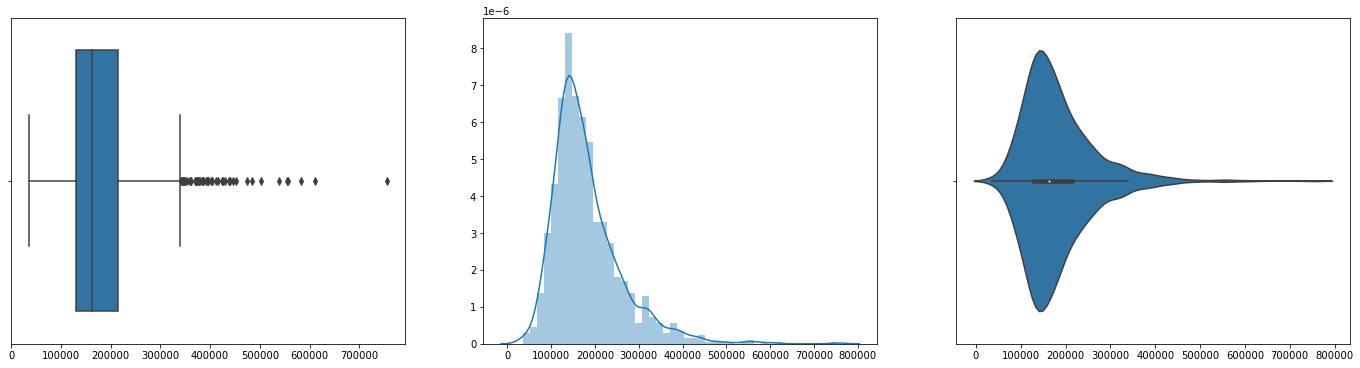

In [53]:
f , axes = plt.subplots(1 , 3 , figsize=(24, 6))
sb.boxplot(houseSalePrice_train , ax = axes[0])
sb.distplot(houseSalePrice_train , ax = axes[1])
sb.violinplot(houseSalePrice_train , ax = axes[2])

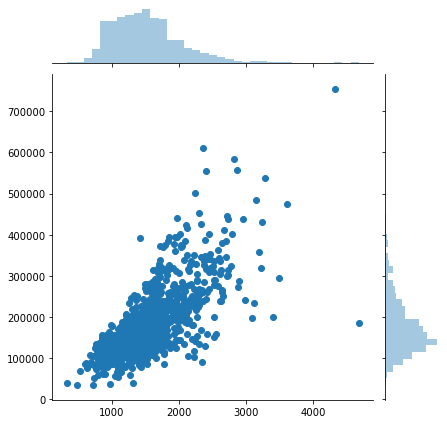

In [58]:
sb.jointplot(x = houseGrLivArea_train , y = houseSalePrice_train)

In [60]:
trainCorrelation = pd.concat([houseGrLivArea_train , houseSalePrice_train] , axis = 1)
trainCorrelation.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.729226
SalePrice,0.729226,1.000000


In [69]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(houseGrLivArea_train , houseSalePrice_train)

LinearRegression()

In [70]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


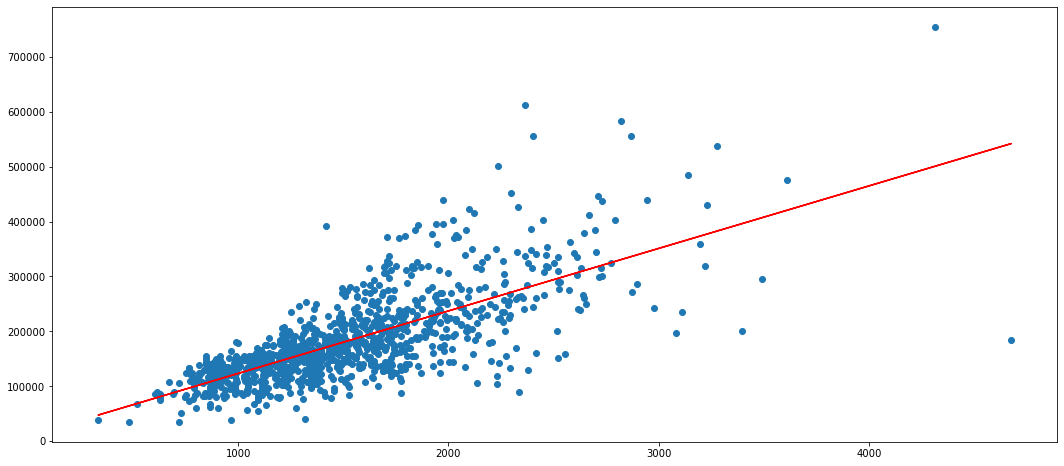

In [92]:
regline_x = houseGrLivArea_train
regline_y = linreg.coef_ * houseGrLivArea_train + linreg.intercept_

f , axes = plt.subplots(figsize = (18,8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x , regline_y , 'red')

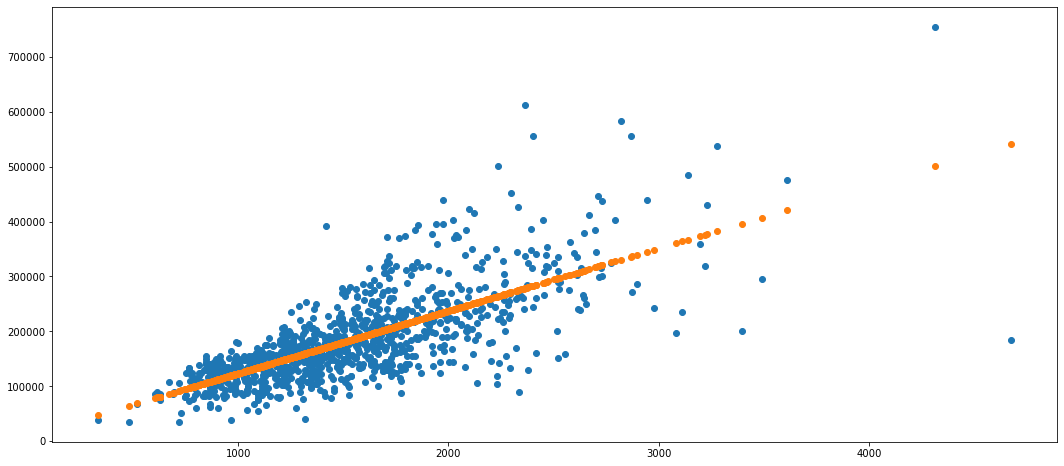

In [112]:
houseSalePrice_train_predict = linreg.predict(houseGrLivArea_train)

plt.subplots(figsize = (18,8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.scatter(houseGrLivArea_train, houseSalePrice_train_predict)

In [106]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_prediction)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036
Root Mean Squared Error (RMSE) 	: 54432.90055399771


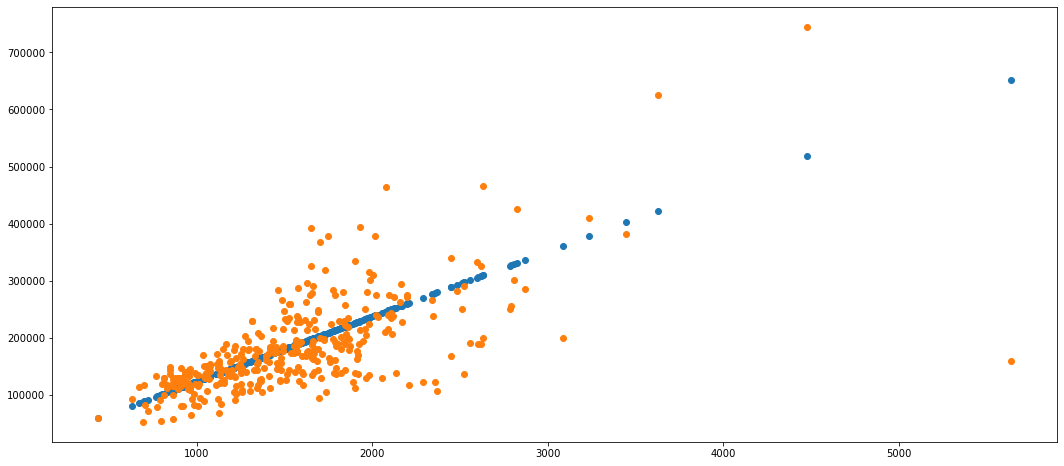

In [114]:
houseSalePrice_test_predict = linreg.predict(houseGrLivArea_test)

plt.subplots(figsize = (18,8))
plt.scatter(houseGrLivArea_test , houseSalePrice_test_predict)
plt.scatter(houseGrLivArea_test , houseSalePrice_test)

In [120]:
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_predict)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40117720006925794
Mean Squared Error (MSE) 	: 3737081522.2960896
Root Mean Squared Error (RMSE) 	: 61131.67364219705
